In [1]:
import json, gzip
from pathlib import Path

import pandas as pd
from ete3 import Tree

from colaml import *
from colaml.misc import dataplot
#from colaml.__main__ import model_from_json

from myconfig import DATA_DIR, ROOT_DIR
from plotutil import *

In [2]:
def load_recon(path):
    with gzip.open(Path(path)) as file:
        tmp = json.load(file)

    recon = ReconPhyTable(
        pd.DataFrame(**tmp['recon']).T.to_dict(orient='list'), 
        PostorderSerializedTree(Tree(tmp['tree'], format=3)), 
        otherstates=[
            (other['label'], pd.DataFrame(**other['states']).T.to_dict(orient='list'))
            for other in tmp['otherstates']
        ]
    )
    
    return recon

In [3]:
def plot_recon(recon):
    from matplotlib.colors import ListedColormap
    cmap = ListedColormap(OkabeItoCUDcy.by_key()['color'])
    
    with plt.rc_context({'lines.linewidth': 0.5, 'axes.prop_cycle': OkabeItoCUDcy}):
        fig, (ax0, ax1) = plt.subplots(
            1, 2, figsize=(178*mm, 120*mm), dpi=300, layout='constrained', sharex=True#, sharey=True
        )
        dataplot.draw_reconstruction(recon, major='states', ax=ax0, horizontal=True)
        ax0.set_title('copy numbers')

        dataplot.draw_reconstruction(recon, major='categories', ax=ax1, horizontal=True, cmap_major=cmap)
        for txt in ax1.legend_.get_texts():
            txt.set_text({'0': '#1', '1': '#2', '2': '#3'}.get(txt.get_text(), txt.get_text()))
        ax1.set_title('rate categories')

        for ax in (ax0, ax1):
            ax.set_frame_on(False)
            ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
            ax.set_ybound(-0.5, recon.tree.ntips-0.5)

        ax0.text(0, 1.01, 'A', fontsize='xx-large', transform=ax0.transAxes)
        ax1.text(0, 1.01, 'B', fontsize='xx-large', transform=ax1.transAxes)

        #fig.canvas.draw()
        
    return fig

In [4]:
%matplotlib inline

In [5]:
from matplotlib.transforms import IdentityTransform, Affine2D

IdentityTransform()
IdentityTransform()


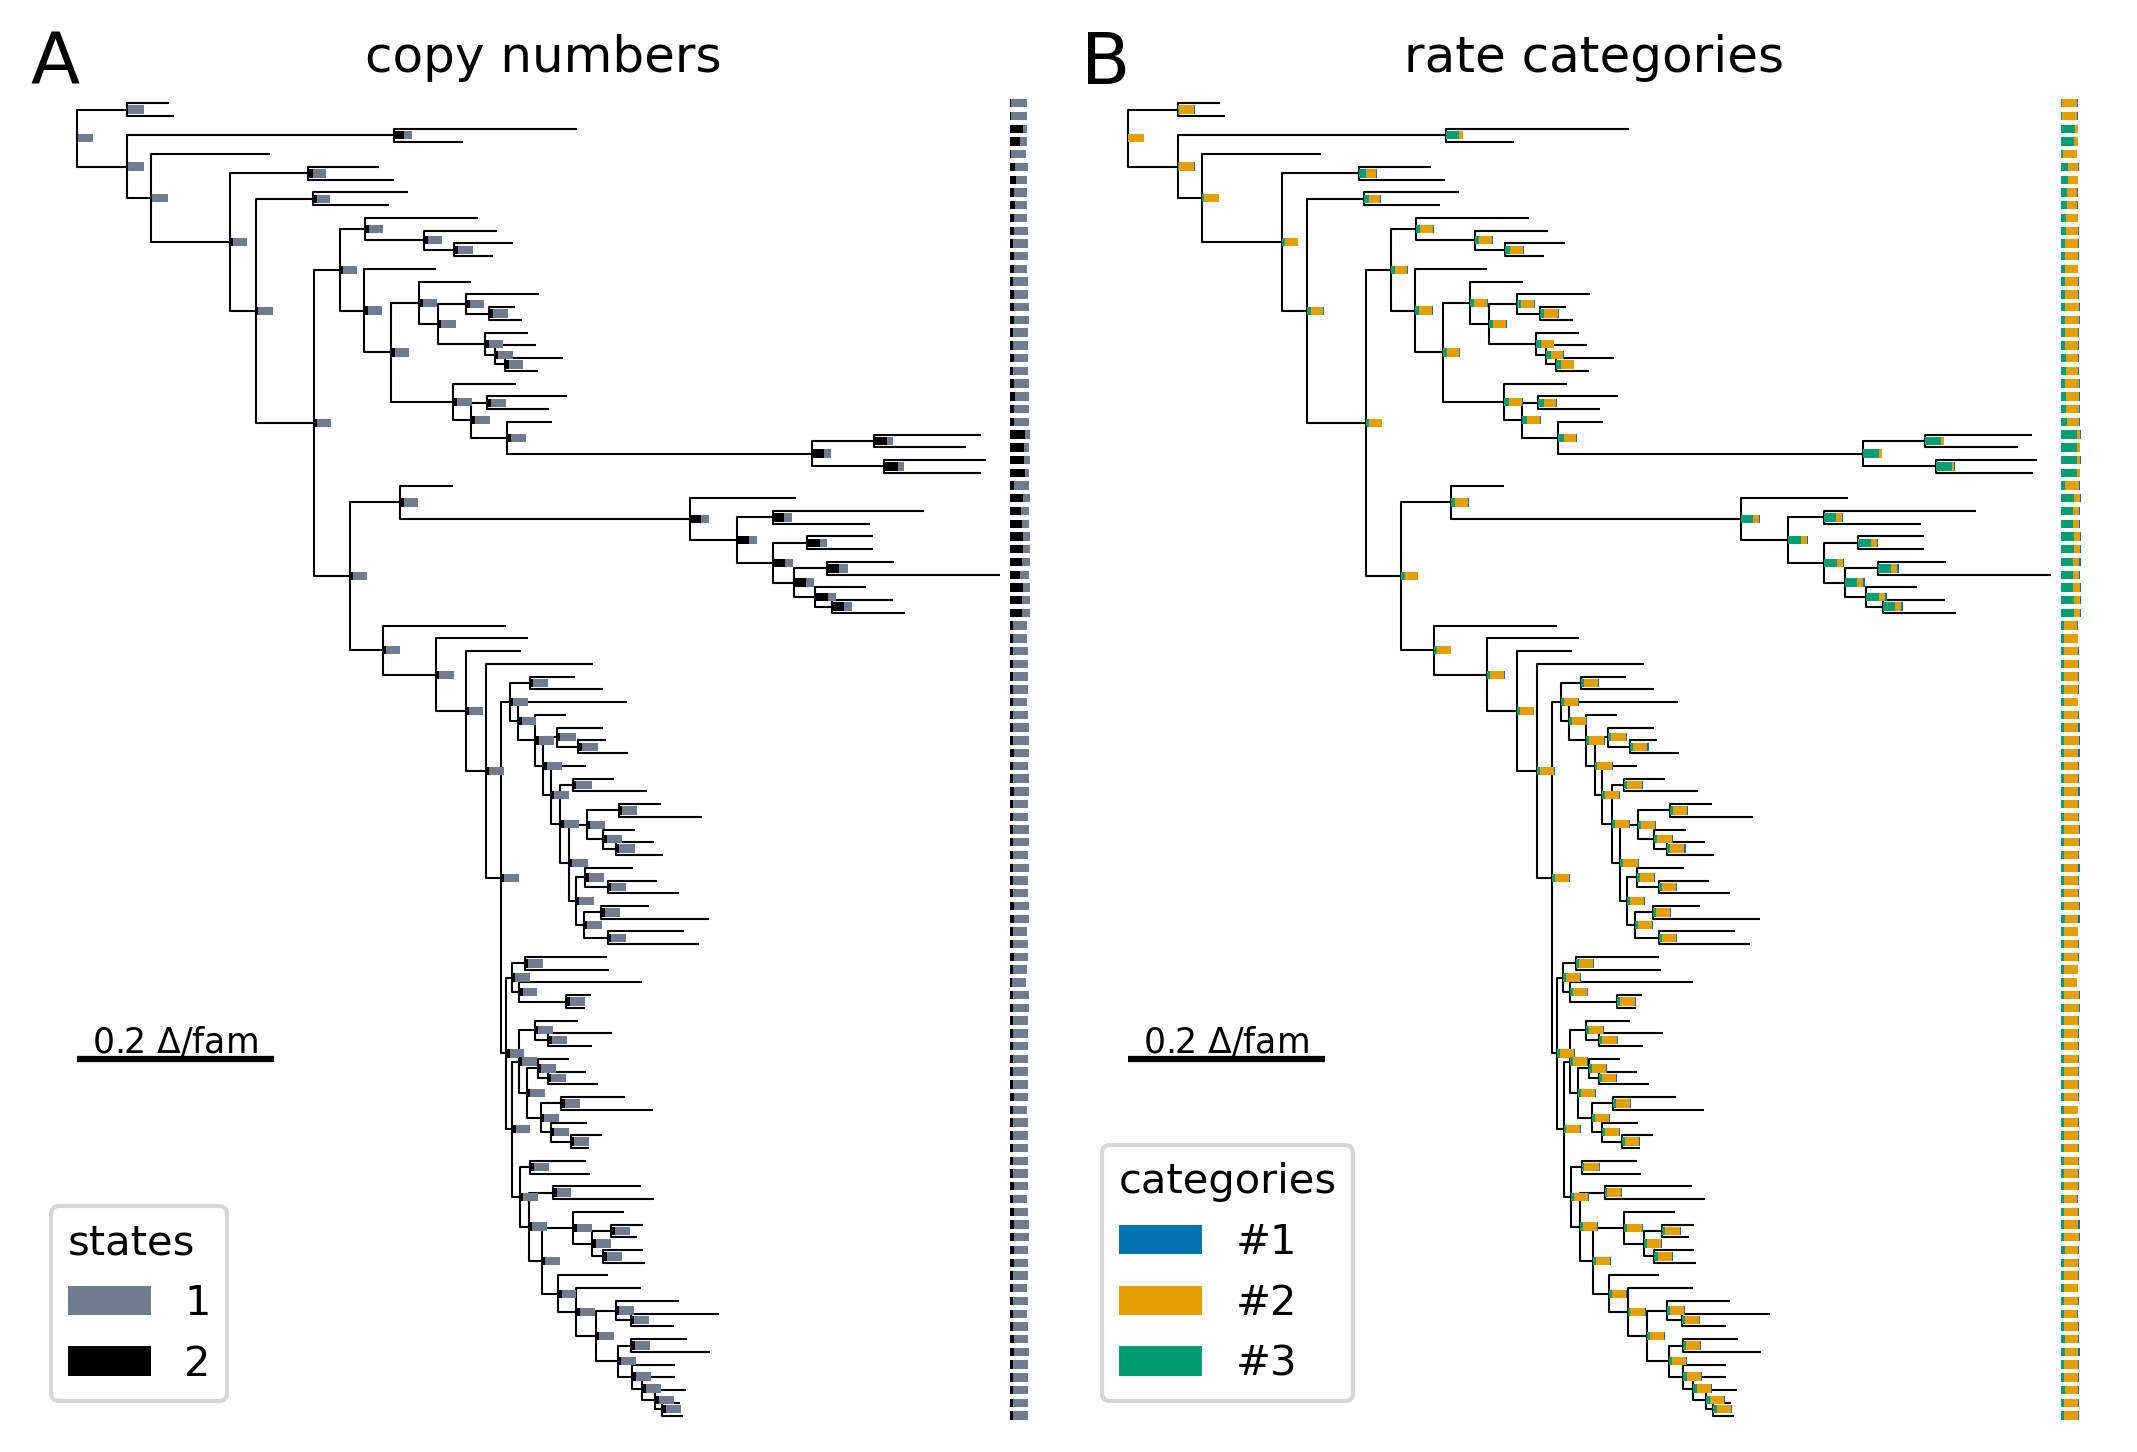

In [6]:
recon = load_recon(ROOT_DIR/'results'/'fish-lmax2-filt05-mrglrecon.json.gz')

fig = plot_recon(recon)
for ax in fig.axes:
    ax.hlines(75, 0, 0.2, color='k')
    ax.text(0.1, 75, '0.2 $\Delta$/fam', ha='center', va='bottom', fontsize='small')

    for col in ax.collections:
        if isinstance(col.get_transform(), IdentityTransform):
            print(col.get_transform())
            col.set_transform(Affine2D())
fig.savefig('jpg/suppl-recon-fish.jpg', bbox_inches='tight', dpi=350)
fig.savefig('png/suppl-recon-fish.png', bbox_inches='tight', dpi=350)
#fig.savefig('pdf/suppl-recon-fish.pdf', bbox_inches='tight', dpi=300)

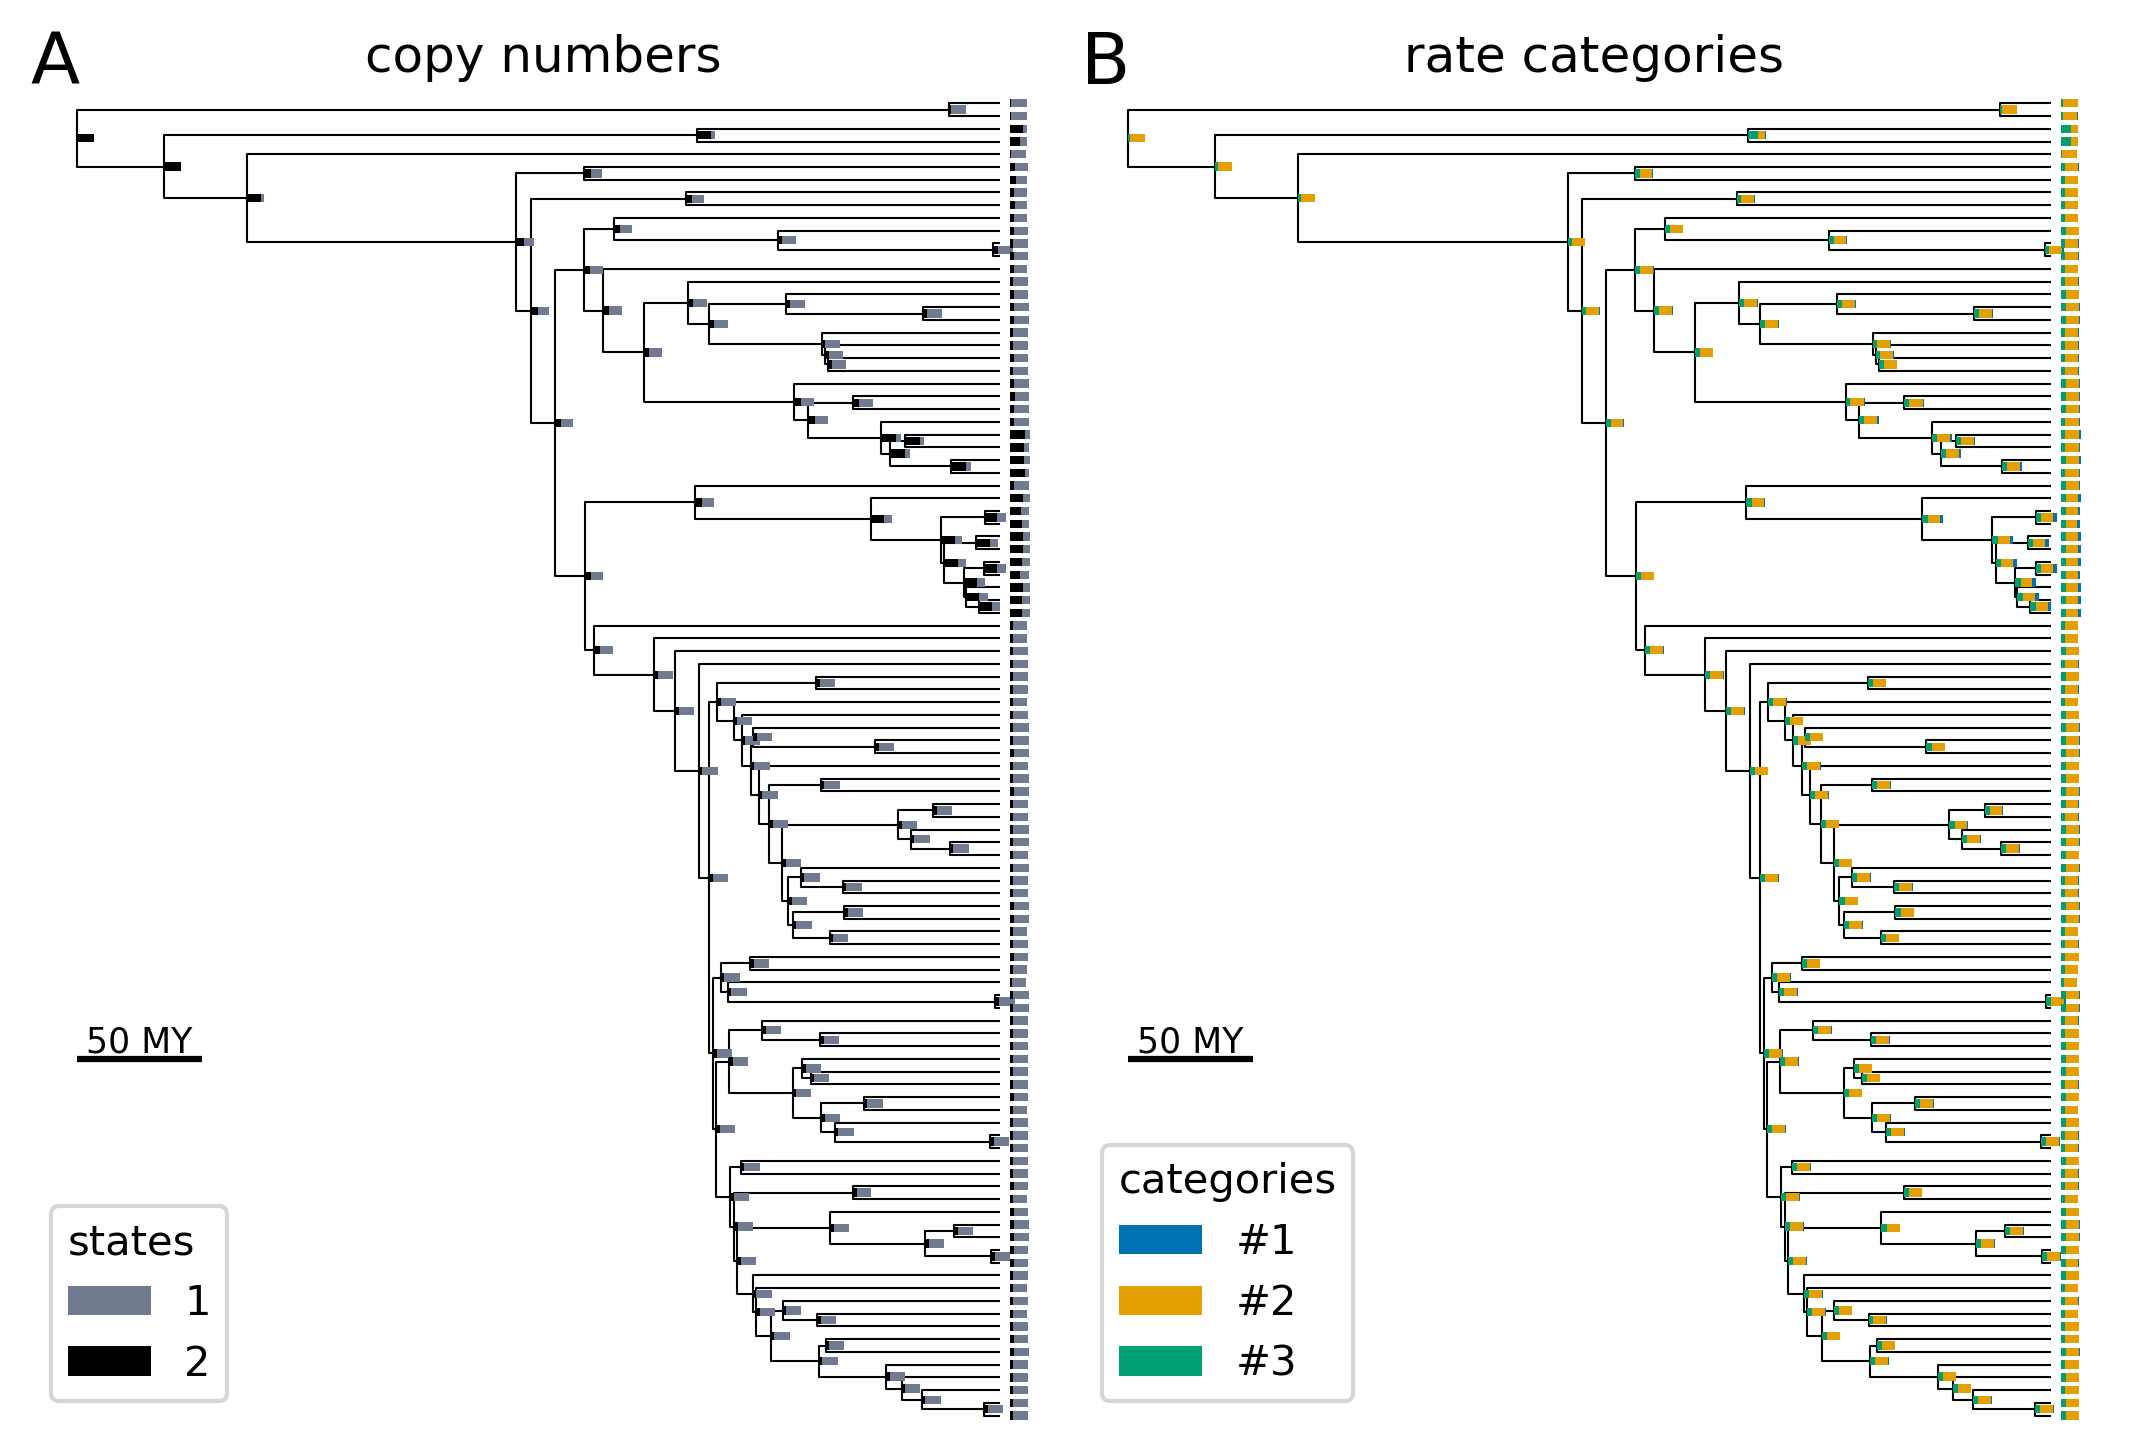

In [7]:
recon = load_recon(ROOT_DIR/'results'/'fish-lmax2-filt05-noadjust-mrglrecon.json.gz')

fig = plot_recon(recon)
for ax in fig.axes:
    ax.hlines(75, 0, 50, color='k')
    ax.text(25, 75, '50 MY', ha='center', va='bottom', fontsize='small')

fig.savefig('jpg/suppl-recon-fish-noadjust.jpg', bbox_inches='tight', dpi=350)
fig.savefig('png/suppl-recon-fish-noadjust.png', bbox_inches='tight', dpi=350)
#fig.savefig('pdf/suppl-recon-fish-noadjust.pdf', bbox_inches='tight')

In [8]:
from colaml.__main__ import model_from_json
from colaml.misc import modelplot
model_path = ROOT_DIR/'results'/'fish-lmax2-filt05-noadjust.bestfit.json.gz'
mmm = model_from_json(model_path)

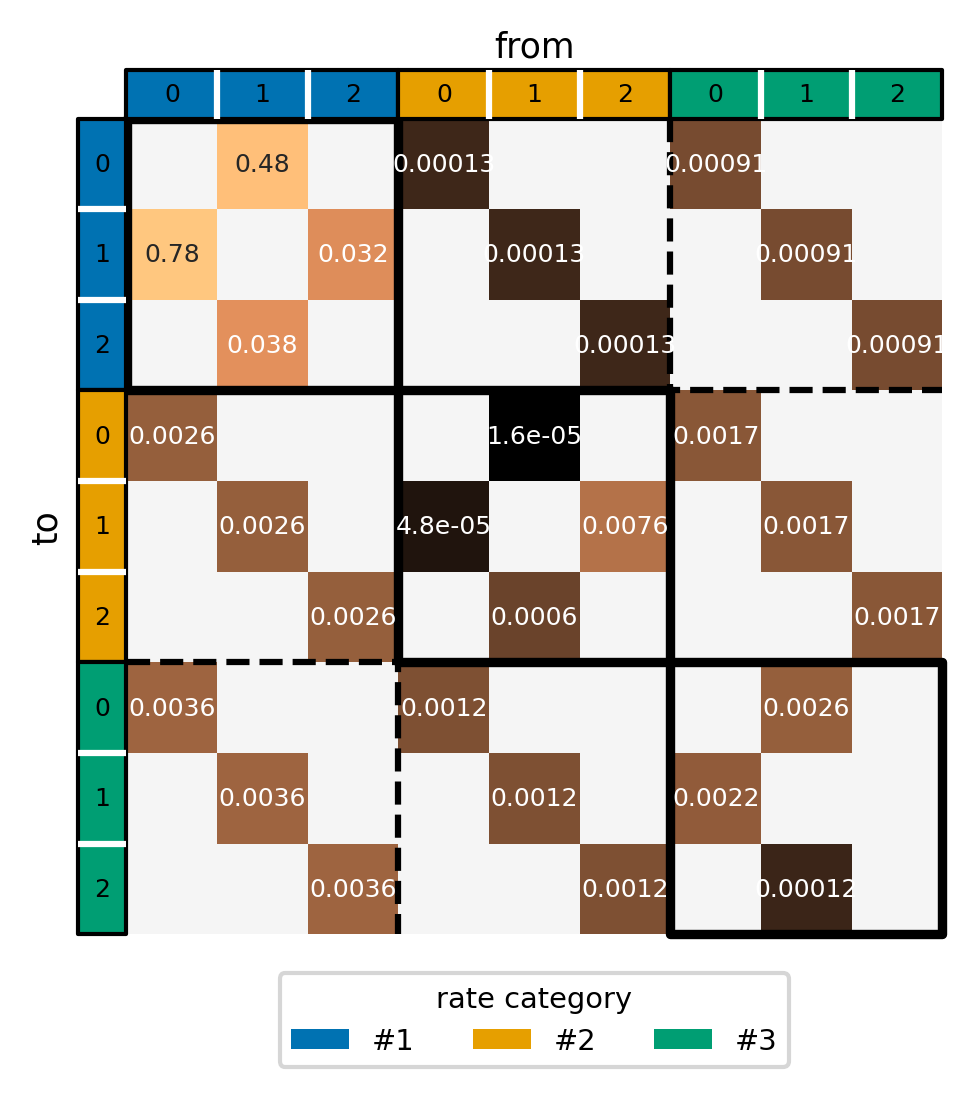

In [9]:
with plt.rc_context({'axes.prop_cycle': OkabeItoCUDcy}):
    fig, ax = plt.subplots(layout='constrained', figsize=(90*mm, 90*mm), dpi=300)
    ax.set_aspect('equal')
    with plt.rc_context({'font.size': 6}):
        modelplot.plot_substmodel(mmm.substmodel, ax=ax)
    ax.xaxis.set_label_position('top')
    ax.yaxis.set_label_position('left')
    ax.set_xlabel('from', labelpad=15, fontsize='small', visible=True)
    ax.set_ylabel('to'  , labelpad=15, fontsize='small', visible=True)
    ax.legend(
        [plt.Rectangle((0,0),0,0,fc=fc) for fc in ('C0','C1','C2')], 
        ['#1','#2','#3'], 
        loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.03), fontsize='x-small', 
        title='rate category', title_fontsize='x-small'
    )
    fig.canvas.draw()

fig.savefig('jpg/suppl-fish-Rnoadj.jpg', bbox_inches='tight', dpi=350)
fig.savefig('png/suppl-fish-Rnoadj.png', bbox_inches='tight', dpi=350)
fig.savefig('pdf/suppl-fish-Rnoadj.pdf', bbox_inches='tight')